Puzzle 1
----

In [1]:
from collections import defaultdict
from lolviz import objviz

In [2]:
class GNode:
    def __init__(self, value):
        self.value = value
        self.edges = []  # outgoing edges
        self.time = 60 + (ord(value) - 64)  
        # time to complete each node = 60 + 1 if A, 2 if B, ..., 26 if Z 
        
    def connect(self, other):
        self.edges.append(other)

def walk(g, visited):
    "Walk of a tree - alphabetically when node has no dependencies"
    global available
    global path
    if g is None or g in visited: 
        return
        
    visited.add(g)  # mark as visited
    path += g.value  # process node before visiting next node
    
    for node in g.edges:
        node_dependency[node.value].remove(g.value)  # no longer dependent on current node

        # if a node has no more dependencies, then the node is avialble 
        if node_dependency[node.value] == set() and \
        (node.value,node) not in available:
            available.append((node.value,node))
    
    sort_available = sorted(available, key=lambda x: x[0])  # sort by alphabet
    
    for val, node in sort_available:
        walk(node, visited) # walk all outgoing edge targets alphabetically

Read in Data & Create Nodes/Tree

In [3]:
node_dependency = defaultdict(set)
nodes = dict()  # dictionary of node objects
rules = list() #(step, next step)

with open('input.txt', 'r') as f:
    for line in f:
        step = line[5]
        next_step = line[36]
        rules.append((step, next_step))
        
        if step not in nodes.keys():
            nodes[step] = GNode(step) #building all potential nodes
        if next_step not in nodes.keys():
            nodes[next_step] = GNode(next_step)
        
        node_dependency[next_step].add(step) 

for step, next_step in rules:  # building connections
    nodes[step].connect(nodes[next_step])

Where to start?

In [4]:
# getting all potential nodes
d = set(nodes.keys()) 

# getting the node letters with 0 dependencies
beginning_nodes = [l for l in d if l not in node_dependency.keys()] 

# getting the node objects with 0 - sort alphabetically
start = sorted(beginning_nodes)[0]

# any remaing node with 0 dependency is available
available = [(l, nodes[l]) for l in sorted(beginning_nodes)[1:]]

In [5]:
print(f'Start at node {start}') 

Start at node O


Time to walk the tree

In [6]:
path = ''
walk(nodes[start], set())
print(path)

OCPUEFIXHRGWDZABTQJYMNKVSL


Visualize Tree

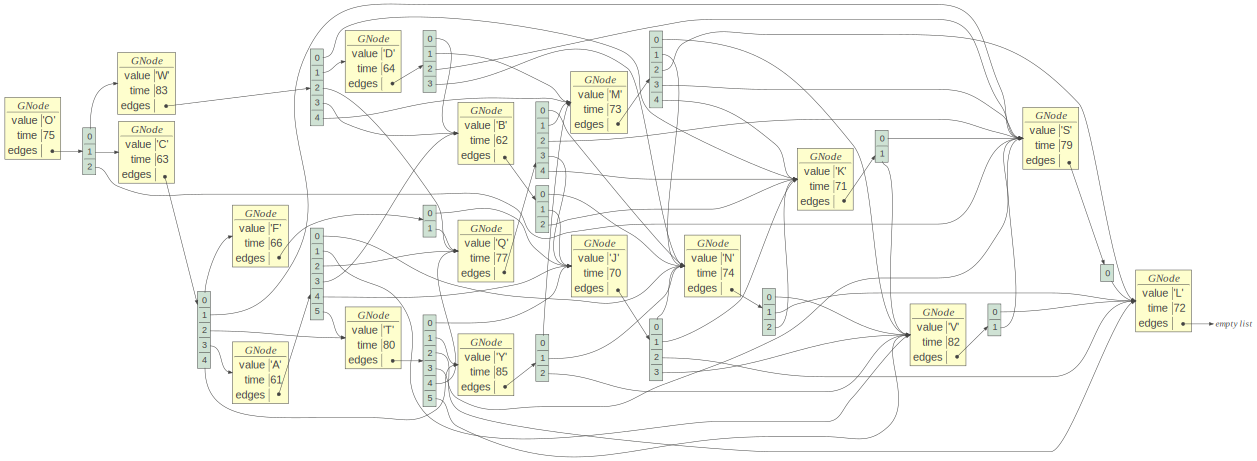

In [7]:
objviz(nodes[start])

Puzzle 2
---

Rebuild dependencies

In [8]:
node_dependency = defaultdict(set)
for step, next_step in rules:  # rebuilding dependencies
    node_dependency[next_step].add(step) 
    
# getting the node letters with 0 dependencies
beginning_nodes = [l for l in d if l not in node_dependency.keys()] 

# any remaing node with 0 dependency is available
available = [(l, nodes[l]) for l in sorted(beginning_nodes)]

Workers

In [9]:
def walk_with_workers(numOfWorkers):
    global node_dependency
    global node
    global available
    
    workerTracker = ['']*numOfWorkers
    x = True
    time = 0

    while x:

        #walking nodes
        for c, node in enumerate(workerTracker):
            if node == '': #not a node - available worker worker
                continue
            elif node.time == 1: # node has completed - will be 0 after this loop
                workerTracker[c] = ''  # worker is free

                for edge in node.edges:  # no longer dependent on completed node
                    node_dependency[edge.value].remove(node.value)

                    # if a node has no more dependencies, then the node is avialble 
                    if node_dependency[edge.value] == set() \
                    and (edge.value, edge) not in available:
                        available.append((edge.value,edge))
            
            else: #node has not completed
                node.time -= 1

        # index of workers with no nodes
        potentialWorkers = set([c for c, worker in enumerate(workerTracker) if worker == '']) 

        sort_available = sorted(available, key=lambda x: x[0])  # nodes ready to be walked

        for val, node in sort_available: # assigning workers
            if len(potentialWorkers) == 0: # no workers are available
                break

            worker = potentialWorkers.pop()  # get an available worker 
            workerTracker[worker] = node  # assign available worker the node

            # node is no longer available because has been assigned to worker
            available.remove((node.value ,node)) 

        # Stoping condition - no nodes are left to walk and all workers are free
        if len(available) == 0 and len(potentialWorkers) == numOfWorkers: 
            x = False
            print(time)


        time += 1  # tracks time (number of loop)

In [10]:
walk_with_workers(5)

991


Improvement
---
- generalize the walk_with_workers function to work like the walk function when numOfWorkers = 1
- not use global variables in functions - pass as parameters